**Scenario, Hypothersis and test**

A distributor of frozen dessert pies wants to evaluate factors thought to influence demand.

Pie Sales (units per week)

Advertising ($100)

Null Hypothesis (Ho) B1 =2 = 0

Alternative hypothesis (H1) : At Least one Bi # 0

Significance level of 0.05)(CI of 95%)

Test: F test (model) and t test (Independent variabels)

Sample size 15 weeks.

IMPORT REQUIRED LIBRARIES

# Import libraries for multiple regression


In [ ]:
# Import libraries for multiple regression analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [ ]:
# add excel dataset to collab
from google.colab import files
uploaded = files.upload()

Saving Pie Sale.xlsx to Pie Sale (1).xlsx


In [ ]:
import pandas as pd

# pie sales excel needs to be read using df info and head
df = pd.read_excel('Pie Sale (1).xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Week                 15 non-null     int64  
 1   Pie Sales            15 non-null     int64  
 2   Price ($)            15 non-null     float64
 3   Advertising ($100s)  15 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 612.0 bytes


,Week,Pie Sales,Price ($),Advertising ($100s)
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0


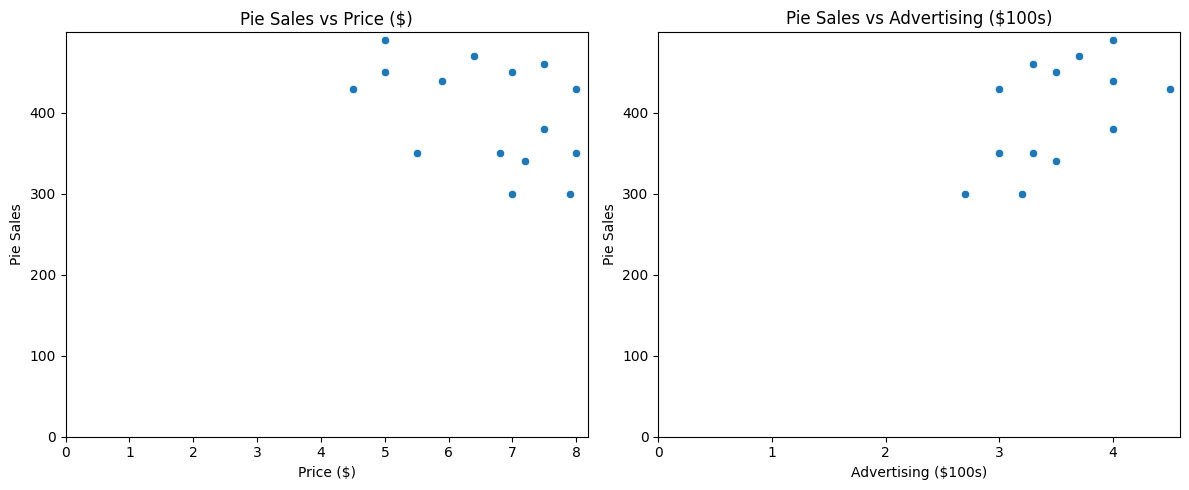

In [ ]:
plt.figure(figsize=(12, 5))

# Scatter plot for Price ($) vs Pie Sales
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(x='Price ($)', y='Pie Sales', data=df)
plt.title('Pie Sales vs Price ($)')
plt.xlabel('Price ($)')
plt.ylabel('Pie Sales')
plt.xlim(0) # Start x-axis at 0
plt.ylim(0) # Start y-axis at 0

# Scatter plot for Advertising ($100s) vs Pie Sales
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.scatterplot(x='Advertising ($100s)', y='Pie Sales', data=df)
plt.title('Pie Sales vs Advertising ($100s)')
plt.xlabel('Advertising ($100s)')
plt.ylabel('Pie Sales')
plt.xlim(0) # Start x-axis at 0
plt.ylim(0) # Start y-axis at 0

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

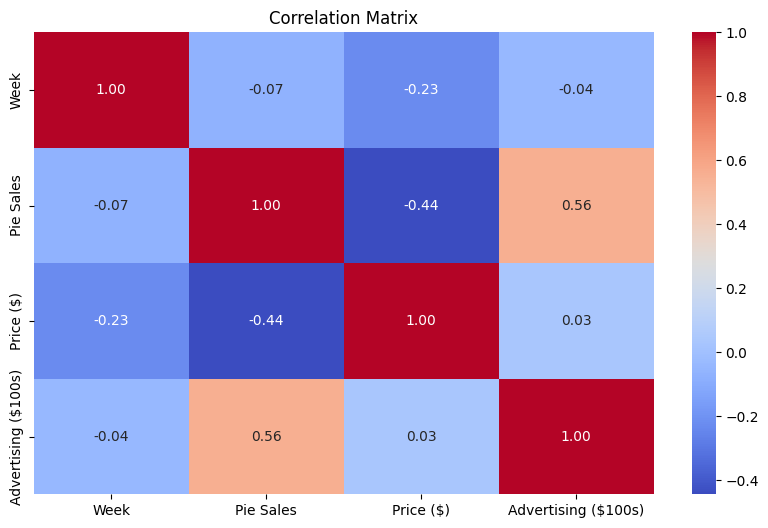

In [ ]:
# run a correlation matrix and a heat map
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()




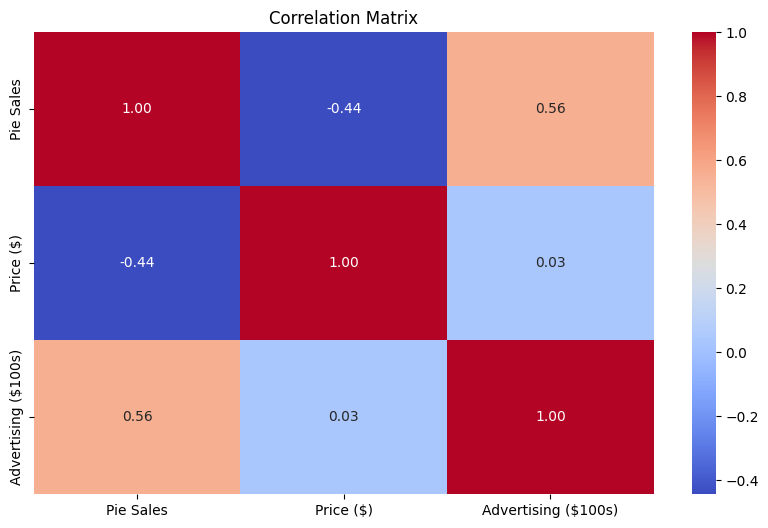

In [ ]:
# remove week from the heat map
correlation_matrix = df.drop('Week', axis=1).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()




In [ ]:
# check for multicollinearity (Varience Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# Define independent variables (features)
X = df[['Price ($)', 'Advertising ($100s)']]

# Add a constant to the independent variables, as VIF expects an intercept
X_constant = sm.add_constant(X)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['feature'] = X_constant.columns
vif_data['VIF'] = [variance_inflation_factor(X_constant.values, i)
                   for i in range(X_constant.shape[1])]

# Display the VIF values
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
               feature        VIF
0                const  86.919127
1            Price ($)   1.000927
2  Advertising ($100s)   1.000927


In [ ]:
model = sm.ols("Q('Pie Sales') ~ Q('Price ($)') + Q('Advertising ($100s)')", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Q('Pie Sales')   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Mon, 17 Nov 2025   Prob (F-statistic):             0.0120
Time:                        14:34:20   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
# Plot residuals vs fitted and vs each independent variable




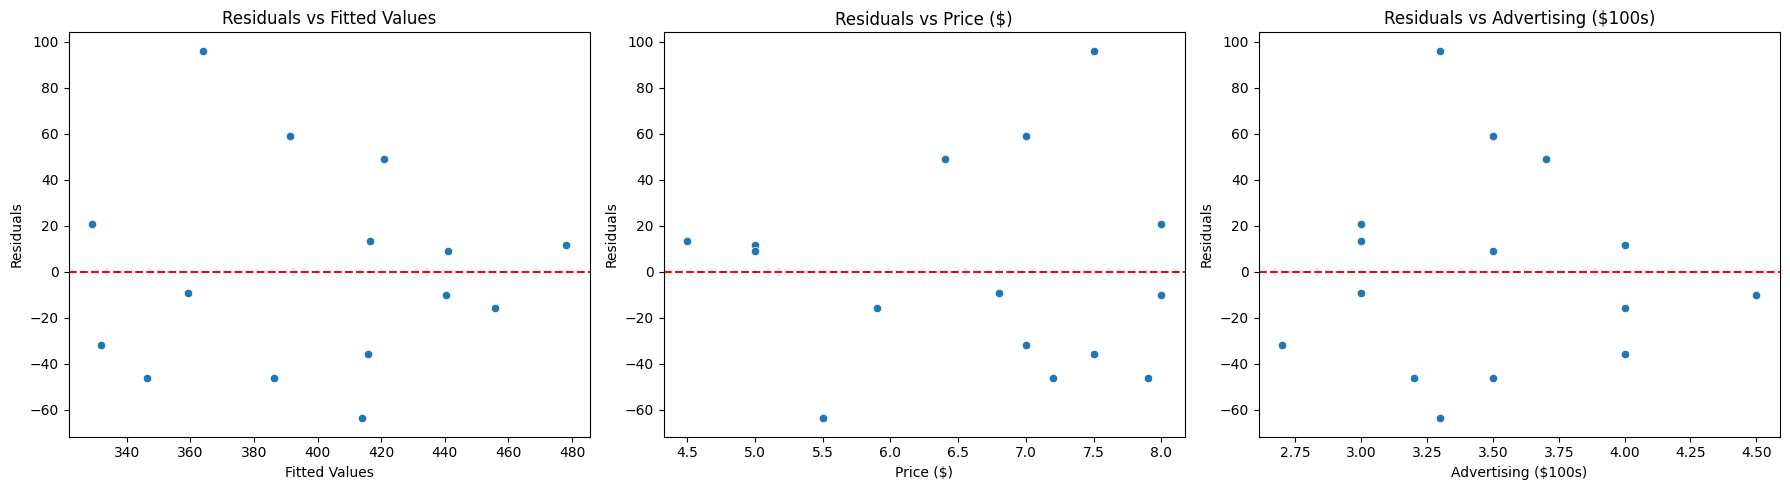

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Residuals vs Fitted Values
sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuals vs Fitted Values')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')

# Plot 2: Residuals vs Price ($)
sns.scatterplot(x=df['Price ($)'], y=model.resid, ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuals vs Price ($)')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Residuals')

# Plot 3: Residuals vs Advertising ($100s)
sns.scatterplot(x=df['Advertising ($100s)'], y=model.resid, ax=axes[2])
axes[2].axhline(0, color='red', linestyle='--')
axes[2].set_title('Residuals vs Advertising ($100s)')
axes[2].set_xlabel('Advertising ($100s)')
axes[2].set_ylabel('Residuals')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [ ]:
# check for normality
import scipy.stats as stats
import matplotlib.pyplot as plt



In [ ]:
# check for normality
import scipy.stats as stats
import matplotlib.pyplot as plt


Shapiro-Wilk Test Statistic: 0.958
Shapiro-Wilk Test P-value: 0.662
Since p-value (0.662) > alpha (0.05), we do not reject the null hypothesis. The residuals appear to be normally distributed.


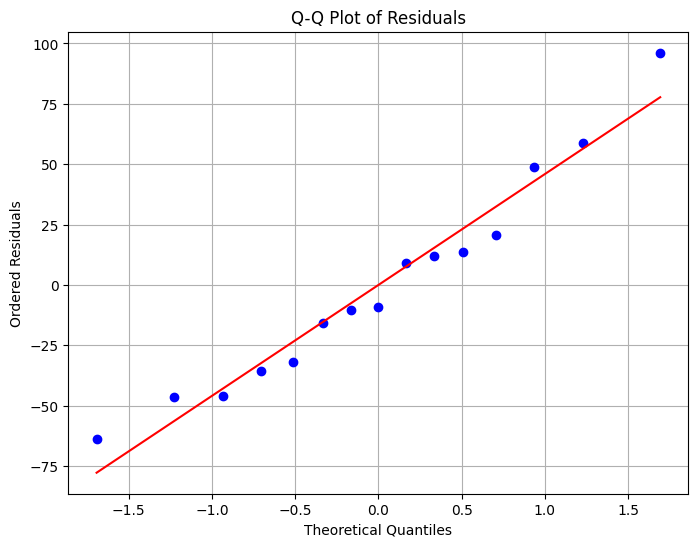

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Get the residuals from the model
residuals = model.resid

# Perform the Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.3f}")
print(f"Shapiro-Wilk Test P-value: {shapiro_test.pvalue:.3f}")

# Interpretation of Shapiro-Wilk test
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print(f"Since p-value ({shapiro_test.pvalue:.3f}) > alpha ({alpha}), we do not reject the null hypothesis. The residuals appear to be normally distributed.")
else:
    print(f"Since p-value ({shapiro_test.pvalue:.3f}) <= alpha ({alpha}), we reject the null hypothesis. The residuals do not appear to be normally distributed.")

# Create a Q-Q plot to visually check for normality
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')
plt.grid(True)
plt.show()


In [ ]:
# predict sales for a price $5.5 and advertising 3.5


In [ ]:
import pandas as pd

# Define the new input values for prediction
new_data = pd.DataFrame({
    'Price ($)': [5.5],
    'Advertising ($100s)': [3.5]
})

# Get predictions and confidence intervals
predictions_summary = model.get_prediction(new_data).summary_frame(alpha=0.05)

# Display the predicted sales and confidence intervals
predicted_sales = predictions_summary['mean'][0]
mean_ci_lower = predictions_summary['mean_ci_lower'][0]
mean_ci_upper = predictions_summary['mean_ci_upper'][0]
obs_ci_lower = predictions_summary['obs_ci_lower'][0]
obs_ci_upper = predictions_summary['obs_ci_upper'][0]

print(f"Predicted Pie Sales for Price $5.5 and Advertising $3.5 (x100): {predicted_sales:.2f} units")
print(f"Mean Confidence Interval (95%): ({mean_ci_lower:.2f}, {mean_ci_upper:.2f})")
print(f"Observed (Prediction) Confidence Interval (95%): ({obs_ci_lower:.2f}, {obs_ci_upper:.2f})")

Predicted Pie Sales for Price $5.5 and Advertising $3.5 (x100): 428.62 units
Mean Confidence Interval (95%): (391.12, 466.12)
Observed (Prediction) Confidence Interval (95%): (318.62, 538.63)
